# Tarea Final: Ajuste de curva y Pandas
### Fabián Alejandro Archila Castro - 2210693 
### David Enrique Ortiz Sanguino - 2210711
#### Octubre 19, 2021

## Actividades


Importamos inicialmente las bibliotecas que utilizaremos: 

In [1]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

1. Debe leer los cuatro archivos. Todos los archivos tienen la misma marca de tiempo. Con el comando pd.read_csv leemos las cuatro listas:

In [2]:
active=pd.read_csv("Global_active_power.csv",delimiter=",",header=0) #Lee los archivos de Global_active_power

intensity=pd.read_csv("Global_intensity.csv" ,delimiter=",",header=0) #Lee los archivos de Global_reactive_power

reactive=pd.read_csv("Global_reactive_power.csv"  ,delimiter=",",header=0) #Lee los archivos de Global_intensity

voltaje=pd.read_csv("Voltage.csv" ,delimiter=",",header=0) #Lee los archivos de Voltage

2. Deberá juntar/mezclar/concatenar los cuatro archivos para obtener un solo archivo. Para esto utilizamos el comando pd.merge(), como este comando solo lee dos columnas, entonces hacemos dos y luego unimos esos dos, obteiendo el DataFrame de todos los datos en cada intervalo de tiempo:

In [3]:
#Junta el Global_active power y el Global_reactive_power en una misma tabla y acomoda cada valor en su correspondiente dato de la columna Datetime..
junto1=pd.merge(active,reactive, how='outer', on='Datetime') 
 
#Junta los datos de Global_intensity y Voltage en una misma tabla, acomoda igualmente cada valor en su correspondiente dato de la columna Datetime.
junto2=pd.merge(intensity,voltaje, how='outer', on='Datetime')

#Ahora junga las tablas anteriores para obtener todos los datos en una misma tabla
datos=pd.merge(junto1,junto2, how='outer', on='Datetime')

#Con comando pd.to_datetime convertimos la Columna Datetime en una lista de fecha y tiempo.
datos['Datetime'] = pd.to_datetime(datos['Datetime'])
datos=datos.set_index('Datetime')

#Imprime la tabla
datos

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Datetime,,,,
2010-01-01 00:00:00,1.790,0.236,7.4,240.65
2010-01-01 00:01:00,1.780,0.234,7.4,240.07
2010-01-01 00:02:00,1.780,0.234,7.4,240.15
2010-01-01 00:03:00,1.746,0.186,7.2,240.26
2010-01-01 00:04:00,1.686,0.102,7.0,240.12
...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,4.0,240.43
2010-11-26 20:59:00,0.944,0.000,4.0,240.00
2010-11-26 21:00:00,0.938,0.000,3.8,239.82


3. Una vez que tenga un solo archivo con la información de las cuatro columnas “Global active power”, “Global reactive power”, “Global intensity” y “Voltaje”, con la correspondiente columna de “Datetime”, verá que los datos tienen escalas de minutos. Seguidamente queremos hacer un resample de los datos para tenerlos ahora en escalas de días (con promedios diarios, con lo que obtendrá un nuevo conjunto de datos que tendra no más de 365 lineas), y también otro resample de los datos para tenerlos ahora en escalas de meses (con promedios mensuales, con lo que obtendrá un nuevo conjunto de datos que tendrá no más de 12 lineas).

In [4]:
#Convertimos los datos de Datetime que está en minutos, a días con .resample('D') y .mean() lo utilizamos para sacar un promedio y se acorten el número de filas.
datos_dias=datos.resample("D").mean()

#Utilizamos el comando dropna() para que los datos que aparecen como NaN no se vayan a tomar en cuenta en futuras operaciones
datos_dias= datos_dias.dropna()

#Imprime la tabla
datos_dias

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Datetime,,,,
2010-01-01,0.850175,0.114817,3.537083,242.565722
2010-01-02,1.176235,0.086656,4.857778,243.631743
2010-01-03,0.901894,0.090331,3.757778,241.822778
2010-01-04,1.171833,0.100322,4.879028,241.754160
2010-01-05,0.916776,0.133697,3.929861,240.647167
...,...,...,...,...
2010-12-07,0.770538,0.198550,3.397222,240.218646
2010-12-08,0.367846,0.117429,1.623750,240.794931
2010-12-09,1.119508,0.139832,4.755694,241.619722


In [5]:
datos_meses=datos.resample("M").mean()
datos_meses

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Datetime,,,,
2010-01-31,1.300640,0.125182,5.430332,242.338522
2010-02-28,1.157539,0.109467,4.836624,242.002101
2010-03-31,1.170015,0.136368,4.920399,241.475284
2010-04-30,1.036334,0.129557,4.363496,241.442527
2010-05-31,1.075957,0.127221,4.551504,241.296151
2010-06-30,0.975306,0.145525,4.170282,240.888985
2010-07-31,0.778947,0.138093,3.337202,240.965167
2010-08-31,0.929452,0.130815,3.954423,241.422944
2010-09-30,0.997541,0.127700,4.223837,241.267517


4 . Ahora queremos  evaluar un modelo sencillo de regresión para tener una relación entre
\Global active power" y \Global intensity" y/o \Voltaje", es decir, algo como: 

Relación 1:**Global active power = A1(Global intensity) + B1**

In [6]:
#definimos una función , que represente la regresión lineal para la intensidad.
def relacion1(intensity, A1, B1):
     return A1*intensity + B1

In [7]:
# definimos la variables valor 1 : que representa la pendiente y la ordenada , asi mismo definimos cov1 , que representa la covarianza.
valor1, cov1 = curve_fit(relacion1, datos['Global_intensity'], datos['Global_active_power'])
valor1

array([ 0.2380262 , -0.00498205])

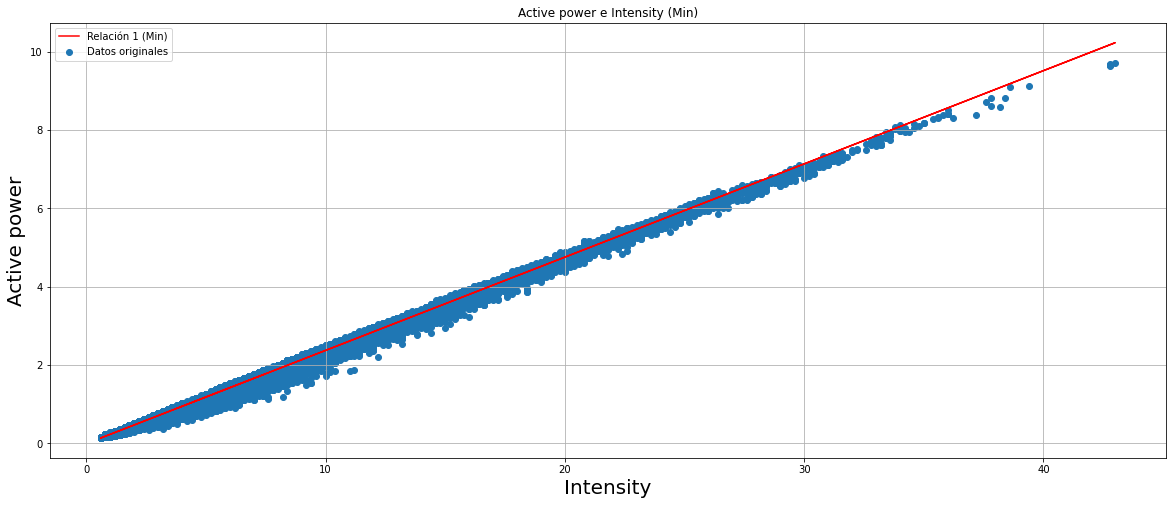

In [8]:
#Usamos plt.figure() para agregar nuestra figura
plt.figure(figsize=(20,8))
plt.plot(datos["Global_intensity"],relacion1(datos['Global_intensity'],*valor1),label='Relación 1 (Min)', color="red")
#Usamos plt.scatter para agregar los datos que tomará nuestra grafica
plt.scatter(datos["Global_intensity"],datos["Global_active_power"],label="Datos originales")
#Usamos plt.xlabel para añadir el titulo del eje x
plt.xlabel('Intensity', size='20')
#usamos plt.ylaber para añadir nuestro titulo para el eje y
plt.ylabel('Active power', size='20')
#plt.title pra ponerle un titulo 
plt.title("Active power e Intensity (Min)")
#plt.legend() para mostrar los labels
plt.legend()
#plt.grid() para mostrar una cuadricula en la grafica
plt.grid()
#plt.show() para ver nuestro resultado final
plt.show()

Aplicamos la misma regresión pero esta vez con los datos de DateTime en dias.

In [9]:
# definimos la variables valor1_d : que representa la pendiente y la ordenada en dias,_d respresenta días y el 1 representa que es relacion1 , asi mismo definimos cov1_d , que representa la covarianza con DateTime en días.
valor1_d, cov1_d=curve_fit(relacion1, datos_dias['Global_intensity'], datos_dias['Global_active_power'])
valor1_d

array([ 0.24305793, -0.02753221])

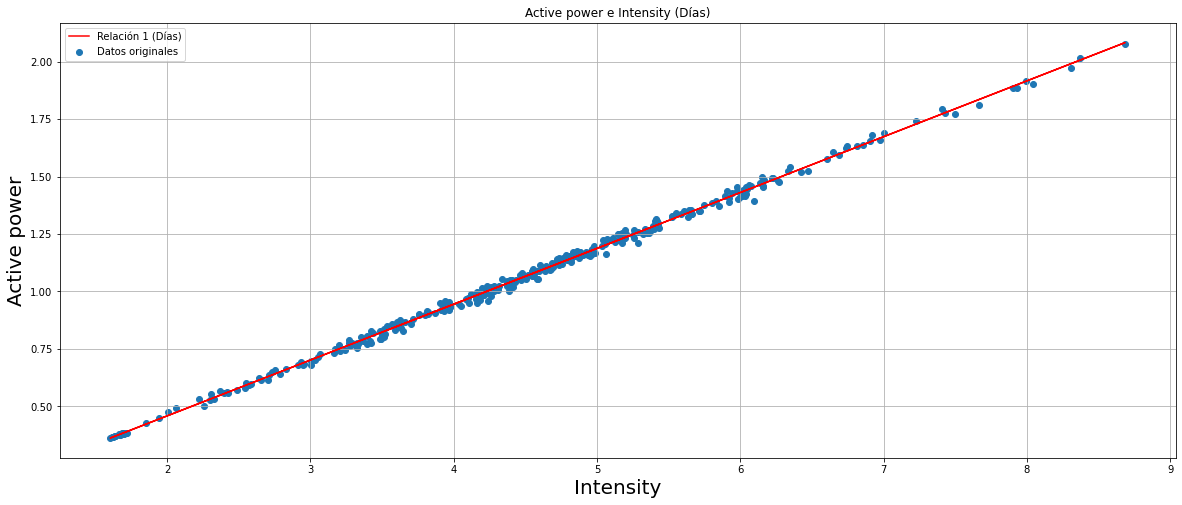

In [10]:
#Usamos plt.figure() para agregar nuestra figura , figsize se usa para ajustar el tamaño de la grafica.
plt.figure(figsize=(20,8))

plt.plot(datos_dias["Global_intensity"],relacion1(datos_dias['Global_intensity'],*valor1_d),label='Relación 1 (Días)', color="red")
#Usamos plt.scatter para agregar los datos que tomará nuestra grafica
plt.scatter(datos_dias["Global_intensity"],datos_dias["Global_active_power"],label="Datos originales")
#Usamos plt.xlabel para añadir el titulo del eje x
plt.xlabel('Intensity', size='20')
#Usamos plt.ylabel para añadir el titulo del eje y
plt.ylabel('Active power', size='20')
#plt.title pra ponerle un titulo 
plt.title("Active power e Intensity (Días)")
#plt.legend() para mostrar los labels
plt.legend()
#plt.grid() para mostrar una cuadricula en la grafica
plt.grid()
#plt.show() para ver nuestro resultado final
plt.show()

Aplicamos la misma regresión pero esta vez con los datos de DateTime en meses.

In [11]:
#definimos valor1_m donde _m representa el DateTime en meses y el 1 representa que es relación1, valor1_m que representa la pendiente y la ordenada en meses,asi mismo definimos cov1_m , que representa la covarianza con DateTime en meses.
valor1_m, cov1_m=curve_fit(relacion1, datos_meses['Global_intensity'], datos_meses['Global_active_power'])
valor1_m

array([ 0.25042854, -0.06067193])

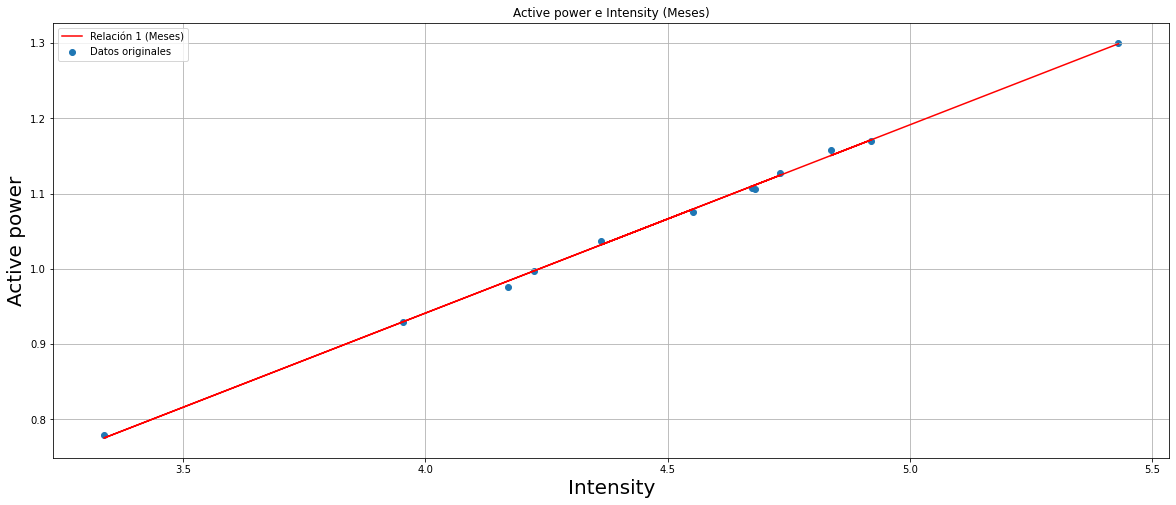

In [12]:
plt.figure(figsize=(20,8))
plt.plot(datos_meses["Global_intensity"],relacion1(datos_meses['Global_intensity'],*valor1_m),label='Relación 1 (Meses)', color="red")
plt.scatter(datos_meses["Global_intensity"],datos_meses["Global_active_power"],label="Datos originales")
plt.xlabel('Intensity', size='20')
plt.ylabel('Active power', size='20')
plt.title("Active power e Intensity (Meses)")
plt.legend()
plt.grid()
plt.show()

Mediante una funcion definimos la relacion2, que representa una regresión lineal del voltaje : 

Relación 2: **Global active power = A2(Voltaje) + B2**

In [13]:
def relacion2(Voltaje, A2, B2):
    return A2*Voltaje + B2

In [14]:
#definimos valor2 representado en segundos , valor2 que representa la pendiente y la ordenada en segundos,asi mismo definimos cov2 , que representa la covarianza con DateTime en segundos.
valor2, cov2=curve_fit(relacion2, datos['Voltage'], datos['Global_active_power'])
valor2

array([-0.13586092, 33.87352423])

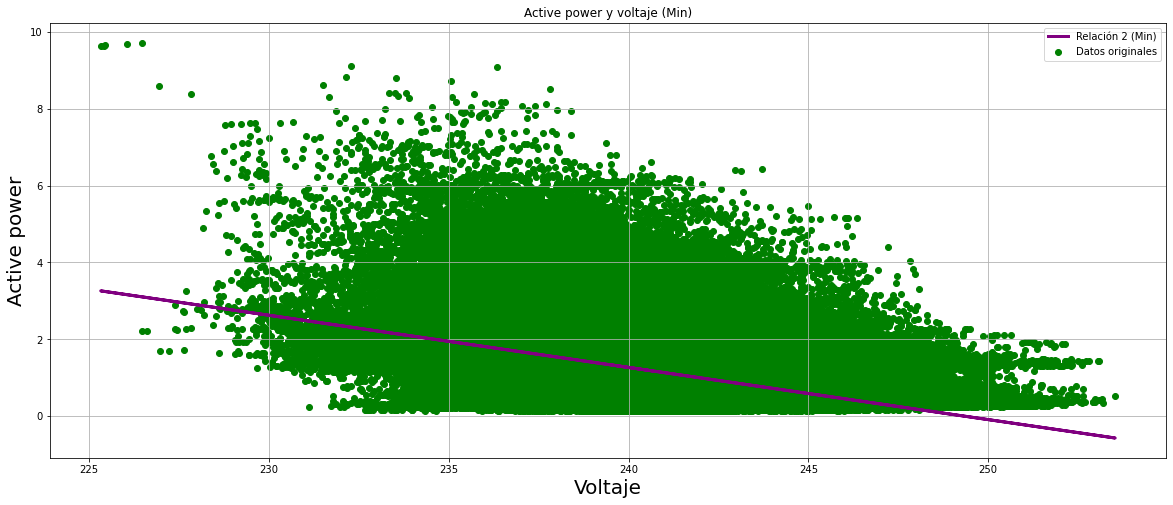

In [15]:
plt.figure(figsize=(20,8))
plt.plot(datos["Voltage"],relacion2(datos['Voltage'],*valor2),label='Relación 2 (Min)', color="purple", linewidth=(3))
plt.scatter(datos["Voltage"],datos["Global_active_power"],label="Datos originales", color='green')
plt.xlabel('Voltaje', size='20')
plt.ylabel('Active power', size='20')
plt.title("Active power y voltaje (Min)")
plt.legend()
plt.grid()
plt.show()

Aplicamos la misma regresión pero esta vez con los datos de DateTime en dias.

In [16]:
#definimos valor2_d, donde el 2 es porque es la relacion 2 y el _d porque el DateTime se esta trabajando en dias , valor2_d que representa la pendiente y la ordenada en dias,asi mismo definimos cov2 , que representa la covarianza con DateTime en dias.
valor2_d, cov2_d=curve_fit(relacion2, datos_dias['Voltage'], datos_dias['Global_active_power'])
valor2_d

array([ 0.0296603 , -6.10166907])

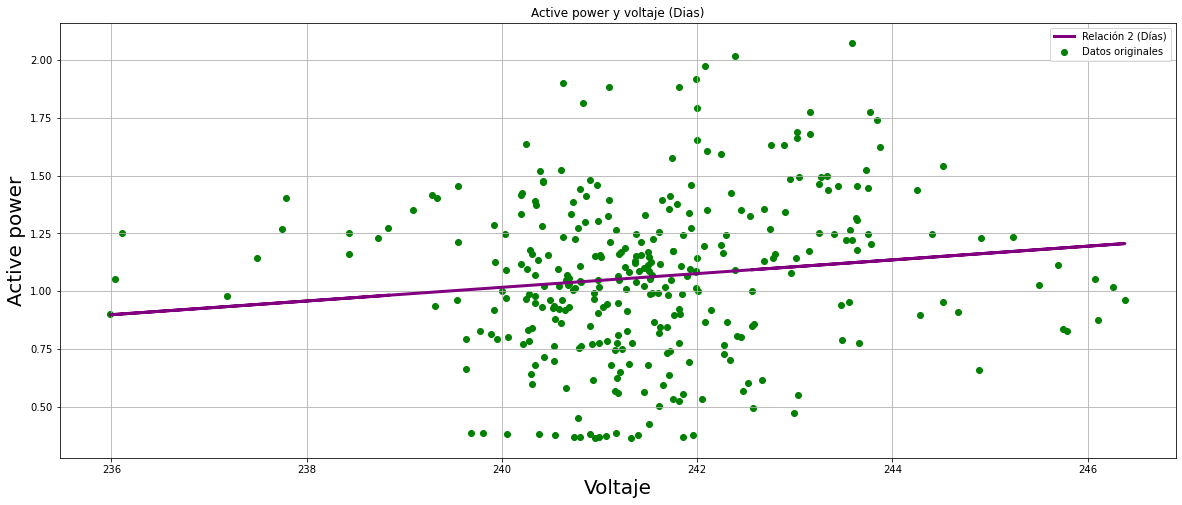

In [17]:
plt.figure(figsize=(20,8))
plt.plot(datos_dias["Voltage"],relacion2(datos_dias['Voltage'],*valor2_d),label='Relación 2 (Días)', color="purple", linewidth=(3))
plt.scatter(datos_dias["Voltage"],datos_dias["Global_active_power"], label="Datos originales", color='green')
plt.xlabel('Voltaje', size='20')
plt.ylabel('Active power', size='20')
plt.title("Active power y voltaje (Dias)")
plt.legend()
plt.grid()
plt.show()

Aplicamos la misma regresión pero esta vez con los datos de DateTime en meses.

In [18]:
#definimos valor2_m, donde el 2 es porque es la relacion 2 y el _m porque el DateTime se esta trabajando en meses , valor2_m que representa la pendiente y la ordenada en meses,asi mismo definimos cov2 , que representa la covarianza con DateTime en meses.
valor2_m, cov2_m=curve_fit(relacion2, datos_meses['Voltage'], datos_meses['Global_active_power'])
valor2_m

array([  0.17281052, -40.67097826])

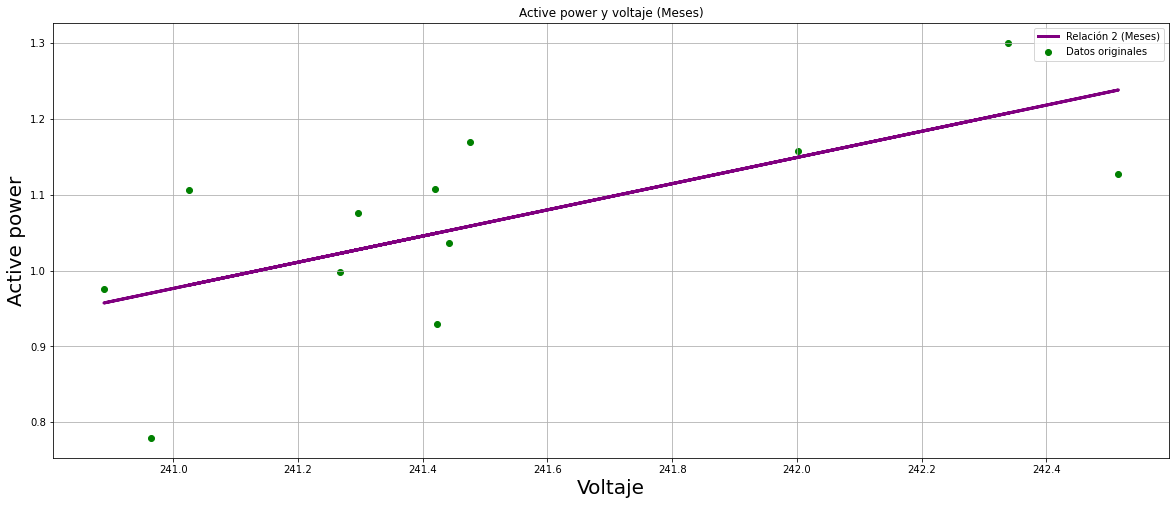

In [19]:
plt.figure(figsize=(20,8))
plt.plot(datos_meses["Voltage"],relacion2(datos_meses['Voltage'],*valor2_m),label='Relación 2 (Meses)', color="purple", linewidth=(3))
plt.scatter(datos_meses["Voltage"],datos_meses["Global_active_power"], label="Datos originales", color='green')
plt.xlabel('Voltaje', size='20')
plt.ylabel('Active power', size='20')
plt.title("Active power y voltaje (Meses)")
plt.legend()
plt.grid()
plt.show()

Mediante una funcion definimos la relacion3, que representa una regresión lineal respecto al voltaje y a la intensidad : 

Relación 3: **Global active power = A31(Global intensity) + A32(Voltaje) + B3**

In [20]:
def relacion3(intensity, Voltaje, A31, A32, B3):
    return A31*intensity + A32*Voltaje + B3

In [21]:
#definimos valor3, donde el 3 es porque es la relacion 3 trabajando con el DateTime en segundos , valor3 que representa la pendiente y la ordenada en segundos,asi mismo definimos cov3 , que representa la covarianza con DateTime en segundos.
valor3, cov3 = curve_fit(relacion3, datos['Global_intensity'], datos['Global_active_power'])
valor3

array([ 0.01752154,  0.2380262 ,  0.01752154, -0.00528839])

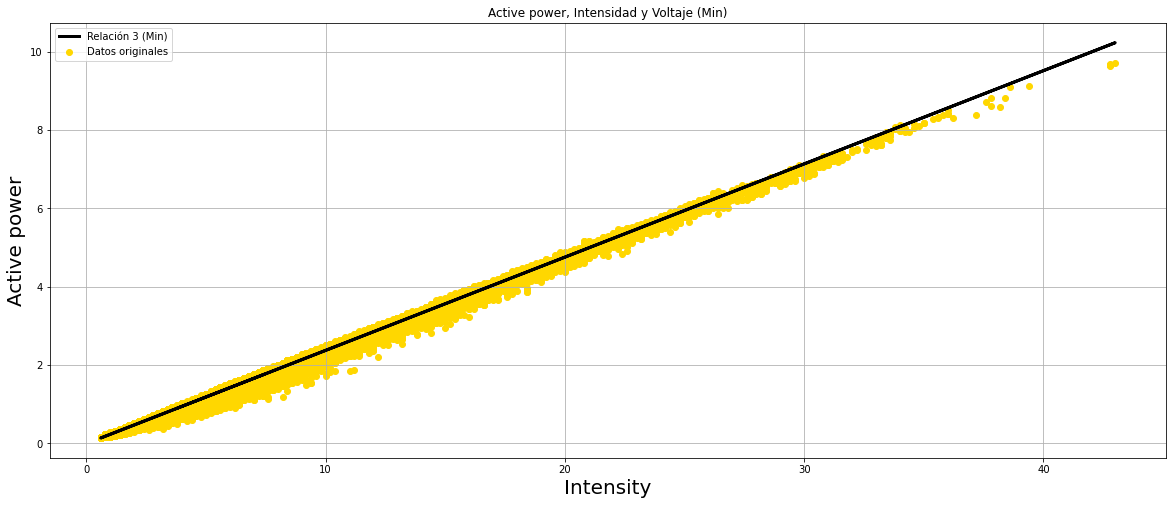

In [22]:
plt.figure(figsize=(20,8))
plt.plot(datos["Global_intensity"], relacion3(datos['Global_intensity'], *valor3),label='Relación 3 (Min)', color="black", linewidth=(3))
plt.scatter(datos["Global_intensity"], datos["Global_active_power"], label="Datos originales", color='gold')
plt.xlabel('Intensity', size='20')
plt.ylabel('Active power', size='20')
plt.title("Active power, Intensidad y Voltaje (Min)")
plt.legend()
plt.grid()
plt.show()

Aplicamos la misma regresión pero esta vez con los datos de DateTime en dias.

In [23]:
#definimos valor3_d, donde el 3 es porque es la relacion 3 y el _d porque el DateTime se esta trabajando en dias , valor3_d que representa la pendiente y la ordenada en dias,asi mismo definimos cov3_d , que representa la covarianza con DateTime en dias.
valor3_d, cov3_d = curve_fit(relacion3, datos_dias['Global_intensity'], datos_dias['Global_active_power'])
valor3_d

array([ 1.5708679 ,  0.24305793, -0.90435622,  1.39309231])

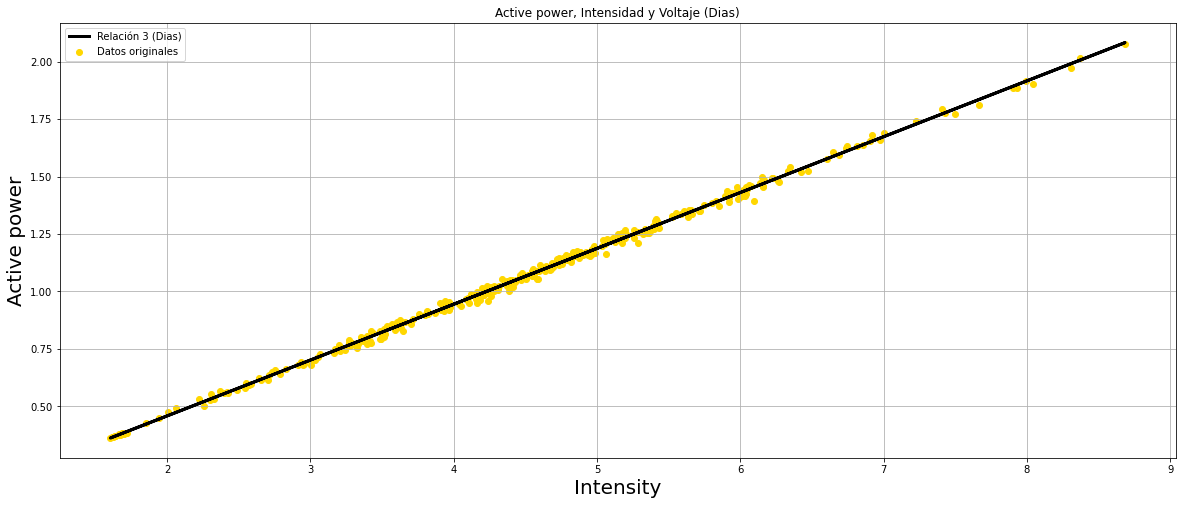

In [24]:
plt.figure(figsize=(20,8))
plt.plot(datos_dias["Global_intensity"], relacion3(datos_dias['Global_intensity'], *valor3_d),label='Relación 3 (Dias)', color="black", linewidth=(3))
plt.scatter(datos_dias["Global_intensity"], datos_dias["Global_active_power"], label="Datos originales", color='gold')
plt.xlabel('Intensity', size='20')
plt.ylabel('Active power', size='20')
plt.title("Active power, Intensidad y Voltaje (Dias)")
plt.legend()
plt.grid()
plt.show()

Aplicamos la misma regresión pero esta vez con los datos de DateTime en meses.

In [25]:
#definimos valor3_m, donde el 3 es porque es la relacion 3 y el _m porque el DateTime se esta trabajando en meses , valor3_m que representa la pendiente y la ordenada en meses,asi mismo definimos cov3_m , que representa la covarianza con DateTime en meses.
valor3_m, cov3_m = curve_fit(relacion3, datos_meses['Global_intensity'], datos_meses['Global_active_power'])
valor3_m

array([-1.62212084,  0.25042854,  3.14697871,  5.04410799])

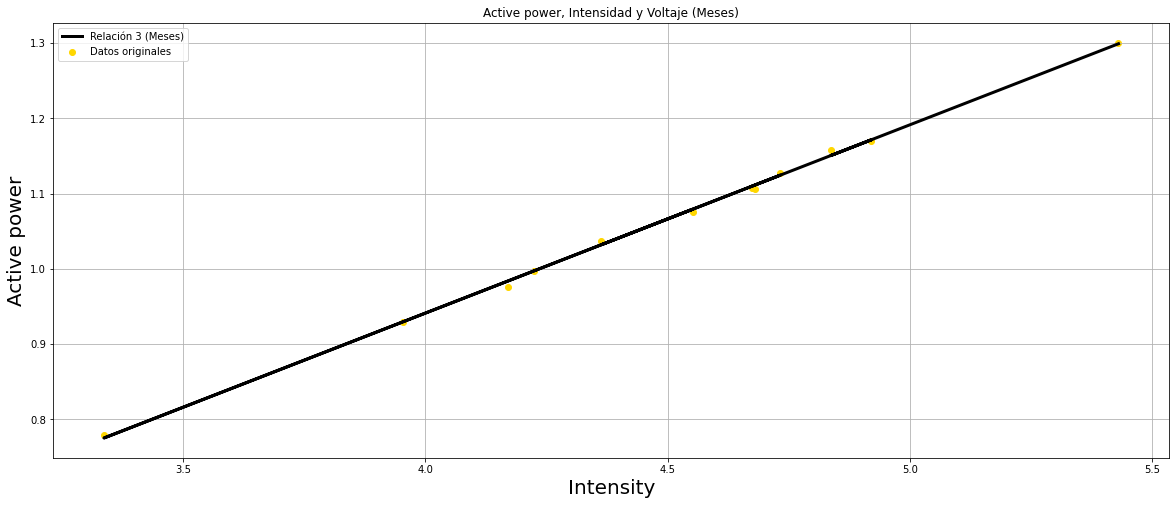

In [26]:
plt.figure(figsize=(20,8))
plt.plot(datos_meses["Global_intensity"], relacion3(datos_meses['Global_intensity'], *valor3_m),label='Relación 3 (Meses)', color="black", linewidth=(3))
plt.scatter(datos_meses["Global_intensity"], datos_meses["Global_active_power"], label="Datos originales", color='gold')
plt.xlabel('Intensity', size='20')
plt.ylabel('Active power', size='20')
plt.title("Active power, Intensidad y Voltaje (Meses)")
plt.legend()
plt.grid()
plt.show()

5. Diga cual de las relaciones fue la mejor y cual la peor. Sera ideal hacer las regresiones con todos los dataset que construyo (es decir, los de frecuencia por minutos, por mes o por dias) para hacer comparaciones de que es apropiado o que no. Haga graficos de los datos y las lineas de regresión como lo hicimos en clase. Para evaluar el mejor modelo calcule los errores de la regresión con los datos.

El error cuando la relación está en minutos

In [27]:
#Representa la función que me dice el error de la relación 1
error1 = np.sqrt(np.mean((datos['Global_active_power'] - relacion1(datos['Global_intensity'], *valor1))**2))

#Imprime el resultado
error1

0.04925499323758528

In [37]:
#Representa la función que me dice el error de la relación 2
error2 = np.sqrt(np.mean((datos['Global_active_power'] - relacion2(datos['Voltage'], *valor2))**2))
error2

0.8487935137294275

In [36]:
#Representa la función que me dice el error de la relación 3
error3 = np.sqrt(np.mean((datos['Global_active_power'] - relacion3(datos['Global_intensity'], *valor3))**2))
error3

0.049254993242000056

Error cuando la relación está en días

In [30]:
error1_d = np.sqrt(np.mean((datos_dias['Global_active_power'] - relacion1(datos_dias['Global_intensity'], *valor1_d))**2))
error1_d

0.015224732467354679

In [31]:
error1_d = np.sqrt(np.mean((datos_dias['Global_active_power'] - relacion1(datos_dias['Global_intensity'], *valor1_d))**2))
error1_d

0.015224732467354679

In [32]:
error3_d = np.sqrt(np.mean((datos_dias['Global_active_power'] - relacion3(datos_dias['Global_intensity'], *valor3_d))**2))
error3_d

0.01522473247155709

Error cuando la relación está en meses

In [33]:
error1_m = np.sqrt(np.mean((datos_meses['Global_active_power'] - relacion1(datos_meses['Global_intensity'], *valor1_m))**2))
error1_m

0.004125583875027927

In [34]:
error2_m = np.sqrt(np.mean((datos_meses['Global_active_power'] - relacion2(datos_meses['Voltage'], *valor2_m))**2))
error2_m

0.09452198916921928

In [35]:
error3_m = np.sqrt(np.mean((datos_meses['Global_active_power'] - relacion3(datos_meses['Global_intensity'], *valor3_m))**2))
error3_m

0.004125583878084648

### Conclusión: 
Comparando, tenemos que la mejor relaciónes la relación 1, pues su error es menor comparado con las demás relaciones cuando está la frecuencia en minutos, en días y en meses.